In [14]:
from fastai.tabular.all import Tensor, tensor, DataLoader, Learner, DataLoaders
from fastai.optimizer import adam_step
from fastai.metrics import accuracy, mse, mae
from torch import nn
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [15]:
class SimpleDataSet(Dataset):
    def __init__(self, data: Tensor, labels: Tensor) -> None:
        self.data = data
        self.labels = labels

    def __len__(self) -> int:
        return self.data.shape[0]

    def __getitem__(self, index) -> tuple[Tensor, float]:
        return (self.data[index,:], self.labels[index,:].item())

In [16]:
features = tensor([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0]])
labels = tensor([[0.0], [1.0], [1.0], [0.0]])

ds = SimpleDataSet(features, labels)
train = DataLoader(ds, batch_size=1)
valid = DataLoader(ds, batch_size=1)

In [17]:
x, y = ds[0]
x.shape, y

(torch.Size([2]), 0.0)

In [18]:
len(ds)

4

In [19]:
dls = DataLoaders(train, valid)

In [20]:
model = nn.Sequential(
    nn.Linear(2, 4),  # Input layer with 2 inputs and 4 hidden units
    nn.ReLU(),        # ReLU activation function
    nn.Linear(4, 1),  # Output layer with 1 hidden unit
    nn.Sigmoid()      # Output activation function
)

In [21]:
learner = Learner(dls, model, metrics=accuracy, loss_func=mae)

SuggestedLRs(valley=0.12022644281387329)

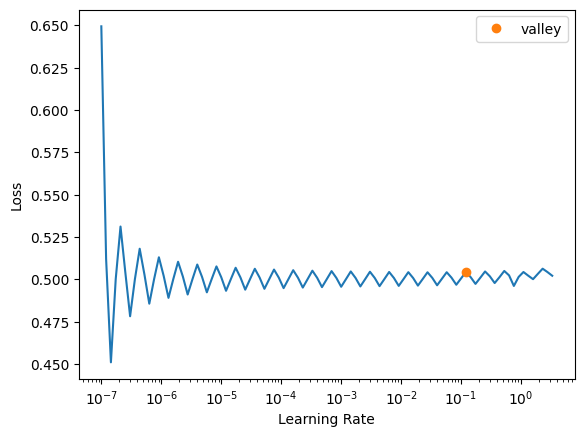

In [22]:
learner.lr_find()

In [23]:
learner.fit(n_epoch=100, lr=0.069)

epoch,train_loss,valid_loss,accuracy,time
0,0.520068,0.499779,0.500000,00:00
1,0.511615,0.499124,0.500000,00:00
2,0.508007,0.497650,0.500000,00:00
3,0.505662,0.494599,0.500000,00:00
4,0.503824,0.490537,0.500000,00:00
5,0.501525,0.486064,0.500000,00:00
6,0.499049,0.478084,0.500000,00:00
7,0.496020,0.465357,0.500000,00:00
8,0.492095,0.450333,0.500000,00:00
9,0.486492,0.434130,0.500000,00:00


In [24]:
net = learner.model
net.eval()
net(tensor([[0.0, 0.0]]))

tensor([[0.0008]], grad_fn=<SigmoidBackward0>)

In [25]:
#learner.save("xor", with_opt=False)

In [31]:
layers = [module for module in learner.model.modules() if not isinstance(module, nn.Sequential)]

In [44]:
for layer in enumerate(layers):
    #print("index", layer[0])
    for par in layer[1].named_parameters():
        print(par)

('weight', Parameter containing:
tensor([[ 1.4059, -2.9083],
        [-1.7421, -1.7155],
        [-2.6649,  2.1603],
        [-1.7113, -1.7202]], requires_grad=True))
('bias', Parameter containing:
tensor([1.4792, 1.7029, 0.2345, 1.7156], requires_grad=True))
('weight', Parameter containing:
tensor([[ 3.4203, -2.6443,  4.2167, -3.0771]], requires_grad=True))
('bias', Parameter containing:
tensor([-3.3627], requires_grad=True))


In [86]:
import encoder
import core
from importlib import reload
reload(encoder)
reload(core)
e = encoder.ModelEncoder()
x = e.encode(learner.model)
with open("./models/xor.json","w") as json:
    json.write(x)

b'\x14\xf6\xb3?\x12":\xc0\xbb\xfd\xde\xbf\xcf\x94\xdb\xbf\xff\x8d*\xc0\xedB\n@\xa4\x0b\xdb\xbf\x021\xdc\xbf'
b'\xacW\xbd?\xb7\xf8\xd9?\x03%p>[\x99\xdb?'
b'\x08\xe6Z@\xcc;)\xc0M\xef\x86@0\xefD\xc0'
b'\xf96W\xc0'
